# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

## Описание проекта

Заказчику нужно научиться определять рыночную стоимость объектов недвижимости на основе архива объявлений о продаже квартир в Санкт-Петербурге и области. В рамках проекта необходимо провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Данные
Архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

#### Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Задача
Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

Описать полученные результаты и зафиксируйте основной вывод проведённого исследования.

### Ход исследования
Данные для исследования хранятся в файте `real_estate_data.csv`, о качестве данных известно мало, поэтому перед тем, как искать зависимости, необходмо провести обзор данных, оценить ошибки и их возможное влияние на исследование, а также устранить критичные ошибки данных.

Таким образом, исследование будет проводиться в 5 этапов:
1. Изучение общей информации (обзор)
2. Предобработка данных
3. Добавление информации в таблицу (расчетных данных)
4. Исследовательский анализа данных
5. Общий вывод

## Шаг 1. Изучение общей информации

In [1]:
import pandas as pd

try:
    data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Построим гисторграммы для всех числовых столбцов, чтобы увидеть как распределены данные.

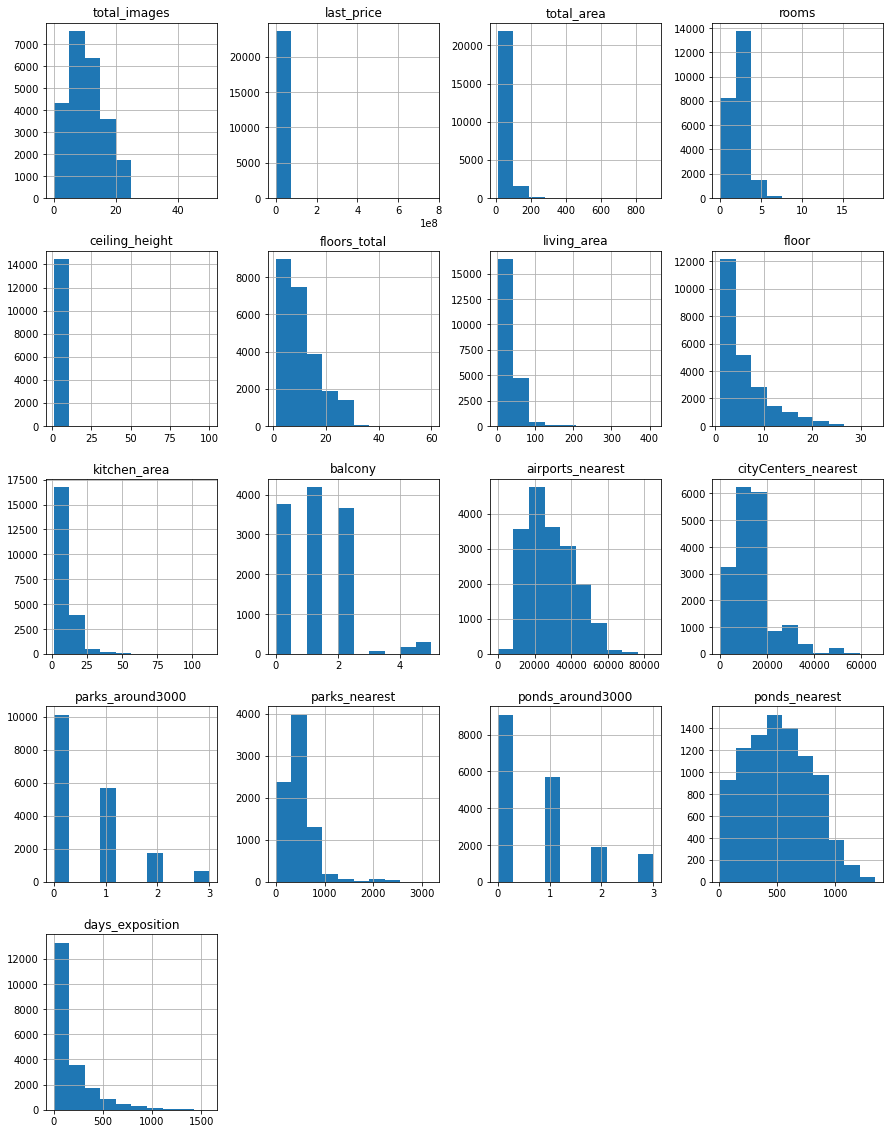

In [2]:
data.hist(figsize=(15, 20));

Как можно видеть из построенных диаграмм, распределение некоторых данных выглядит нормально, другие имеют длинные "хвосты", в которых могут находиться аномальные значения. В следующих шагах заполним пропуски там, где это возможно, откорректируем форматы данных, разберемся с выбросами и дубликатами.

## Шаг 2. Предобработка данных

### 2.1 Заполнение пропусков

Чтобы провести анализ, необходимо заполнить пропуски там, где это возможно и понять, откуда они возникли. 
Для начала посмотрим, в каких столбцах есть пропущенные значения:

In [3]:
# Отображение пропусков в процентах
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**1. Столбец `ceiling_height`**:

In [4]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Максимальное значение 100, минимальное 1 - вряд ли они возможны в реальности, но пока что заполним пропуски медианным значением. Это значение выбрано, потому что оно выглядит реалистично и соответствует стандартной высоте потолков в большинстве квартир.

Возможно, продавцы не указывали высоту потолка, потому что она не выделяется (обычно стремятся выделить высокие потолки, а стандартные могли не указать).

In [5]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

**2. Столбец `floors_total`**:

Посмотрим на описание данных в этом столбце, а также рассмотрим его в сочетании со столбцом `floor`

In [6]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [7]:
data.query('floors_total.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Медианное значение - 9 этажей выглядит реалистичным, но его нельзя использовать для подстановки значений: смотрим на столбец `floor` - есть значения, превышающие это число. Установить данные из этого столбца в качестве `floors_total` тоже было бы неверно - тогда все эти квартиры окажутся на последнем этаже, что повлияет на статистику. 
В отстутствии адресов домов, невозможно посмотреть высоту каждого отдельного здания.
При этом если оставить пропуски как есть, не получится обработать этот столбец в дальнейшем, значит, строки с пропусками придется удалить.

In [8]:
try:
    data.dropna(subset='floors_total', inplace=True)
except TypeError:    
    data.dropna(subset=['floors_total'], inplace=True)
    
data['floors_total'].isna().sum()

0

**3. Столбцы `living_area` и `kitchen_area`**

Здесь значения можно заполнить на основе столбца `total_area`, в котором нет пропусков:
1. вычислим какую среднюю долю занимет жилая площадь и кухня
2. вычислим на основе полученных долей площади кухни и жилой зоны

In [9]:
# найдем усредненные доли жилой зоны и кухни в квартирах
living_mean_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_mean_ratio = data['kitchen_area'].mean() / data['total_area'].mean()

# вычислим площади жилой зоны и кухни на основе полученных коэффициентов и общей площади квартир
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_mean_ratio)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_mean_ratio)

In [10]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,90.810749,9,NaN,...,27.836882,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**4. Столбец `is_apartment`**

В столбце много пропусков, но посмотрим, чем заполнены непустые ячейки:

In [11]:
print('Столбец "is_apartment"', data['is_apartment'].unique())

Столбец "is_apartment" [nan False True]


В столбце `is_apartment` есть значения False: значит, некоторые продавцы прямо указали, что квартира не является апартаментами. Скорее всего, пропуск занчения означает то же самое, поэтому можно заполнить его значениями False.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

**5. Столбцы `balcony`, `parks_around3000`, `ponds_around3000`**

В столбцах есть и 0 и пропущенные значения. Скорее всего, эти параметры не являются обязательными и в случае отсутствия балкона, парка или водоема поблизости, его можно пропустить, поэтому считаю, что здесь тоже можно заполнить пропуски значениями 0.

In [13]:
# смотрим, какие значения встрачаются в столбцах
print('Столбец "balcony"', data['balcony'].unique())
print('Столбец "parks_around3000"', data['parks_around3000'].unique())
print('Столбец "ponds_around3000"', data['ponds_around3000'].unique())

Столбец "balcony" [nan  2.  0.  1.  5.  4.  3.]
Столбец "parks_around3000" [ 1.  0.  2. nan  3.]
Столбец "ponds_around3000" [ 2.  0.  3.  1. nan]


In [14]:
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

**6. Столбец `locality_name`**

При наличиии географических координат или адреса, эти пропуски было бы легко восстановить, но в нашем датасете нет этих данных. Посмотрим, что можно сделать.

Есть предположение, что если в датасете указано расстояние от центра, то это расстояние от центра Санкт-Петербурга, а значит, название локации можно восстановить там, где заполнен `cityCenters_nearest`. 

In [15]:
(data
     .query('~cityCenters_nearest.isna()')
     .pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=['count', 'max'])
)

,count,max
,cityCenters_nearest,cityCenters_nearest
locality_name,,
Зеленогорск,24,62706.0
Колпино,337,37477.0
Красное Село,174,41792.0
Кронштадт,95,51511.0
Ломоносов,132,61495.0
Павловск,38,36445.0
Петергоф,201,49574.0
Пушкин,368,35610.0


Почти. Большинство населенных пунктов, где заполнено расстояние от центра являются районами Санкт-Петербурга, кроме Мурино и Щеглово - эти населенные расположены в Ленинградской области. А это значит, что не получится заполнить пропуски значением "Санкт-Петербург", т.к. значение неочевидно. Думаю, можно удалить эти строки, поскольку они бесполезны для анализа.

In [16]:
try:
    data.dropna(subset='locality_name', inplace=True)
except TypeError:    
    data.dropna(subset=['locality_name'], inplace=True)
    
data['locality_name'].isna().sum()

0

**7. Столбец `airports_nearest`**

Есть предположение, что пропуски можно заполнить средним значением для каждой локации. Однако, это сработает не для локаций с неуказанным названием. Также это не сработает для населенных пунктов, представленных единственной строкой, где не заполнено значение `airports_nearest`. 

In [17]:
(data
     .query('locality_name != "Санкт-Петербург" & locality_name != "Не указано" & airports_nearest.isna()')
     .pivot_table(index='locality_name', values='airports_nearest', aggfunc=['sum', 'count'])
)

,sum,count
,airports_nearest,airports_nearest
locality_name,,
Бокситогорск,0.0,0
Волосово,0.0,0
Волхов,0.0,0
Всеволожск,0.0,0
Выборг,0.0,0
...,...,...
село Путилово,0.0,0
село Рождествено,0.0,0


В этих строках с такими названиями населенных пунктов вообще не указаны аэропорты, а значит, восстановить расстояние не получится.

Проверим, есть ли пропуски в столбце `airports_nearest` в таких строках, где есть какие-либо значения в том же столбце.

In [18]:
filled = (data
         .query('locality_name != "Санкт-Петербург" & locality_name != "Не указано"')
         .pivot_table(index='locality_name', values='airports_nearest', aggfunc=['mean'])
        )

filled

,mean
,airports_nearest
locality_name,
Зеленогорск,73300.250000
Колпино,26375.863501
Красное Село,26610.028736
Кронштадт,67469.263158
Ломоносов,48308.280303
Павловск,21053.342105
Петергоф,40184.676617
Пушкин,16447.869919


In [19]:
checklist = []

for name in filled.index:
    if data.query('locality_name == @name & airports_nearest.isna()')['airports_nearest'].count() > 0:
        checklist.append(name)
        
print('Не указано расстояние до аэропорта в населенных пунктах:', checklist)

Не указано расстояние до аэропорта в населенных пунктах: []


Список пуст, а значит, что во всех объектах в указанных выше населенных пунктах указано расстояние до аэропорта: устранять пропуски не требуется.

Посмотрим, есть ли пропуски расстояния до аэропорта для Санкт-Петербурга и сколько их. Если эти пропуски заполнить средним значением, расстояние будет неточным, т.к. город имеет большую площадь.

In [20]:
# # есть ли устых значений для Санкт-Петербурга
data.query('locality_name == "Санкт-Петербург" & airports_nearest.isna()')['airports_nearest'].isna().sum()

84

**8. Столбец `cityCenters_nearest`**

Здесь ситуация отличается от той, что наблюдалась в столбце `airports_nearest`. Потому что аэропорт на город и область один, а вот центры муниципальных образований отличаются, поэтому не получится восстановить пропущенные значения для объектов, расположенных в области. 

Для объектов из Санкт-Петербурга, значения тоже не заполнить, т.к. нет адреса или координат для восстановления.

**9. Столбцы `parks_nearest` и `ponds_nearest`**

Здесь нужно проверить, что пропуски в этом столбце соответствуют нулям в столбце `parks_around3000` или `ponds_nearest`- такие значения заполнить нельзя, если нет парка (водоема), расстояние до него измерить невозможно.

In [21]:
data.pivot_table(index='ponds_around3000', values='ponds_nearest', aggfunc=['count', 'sum'])

,count,sum
,ponds_nearest,ponds_nearest
ponds_around3000,,
0.0,0,0.0
1.0,5662,3322866.0
2.0,1883,854796.0
3.0,1491,505602.0


Кажется, все строки, где нет водоемов поблизости, не заполнены, это корректно.

In [22]:
data.pivot_table(index='parks_around3000', values='parks_nearest', aggfunc=['count', 'sum'])

,count,sum
,parks_nearest,parks_nearest
parks_around3000,,
0.0,4,12457.0
1.0,5647,3081920.0
2.0,1736,644403.0
3.0,643,200581.0


Получается, что в каких-то строках парка нет, а расстояние есть, нужно посмотреть, что там происходит.

In [23]:
data.query('parks_around3000 == 0 & ~parks_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,2.65,18.0,37.0,13,False,...,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,2.65,5.0,17.7,2,False,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.00,2.0,80.0,2,False,...,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.60,5.0,16.5,1,False,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


Все эти значения больше 3000, а значит, не подходят под критерии "парк в пределах 3км". Придется "обнулить" их.

In [24]:
import numpy as np

data.loc[(data['parks_around3000'] == 0) & (~data['parks_nearest'].isna()), 'parks_nearest'] = np.nan 

Теперь рассмотрим обратную ситуацию: парки (водоемы) есть, а расстояние неизвестно.

In [25]:
data.query('ponds_around3000 != 0 & ponds_nearest.isna()').sort_values(by='ponds_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [26]:
data.query('parks_around3000 != 0 & parks_nearest.isna()').sort_values(by='parks_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Пропусков нет, можно переходить к другим столбцам.

**10. Столбец `days_exposition`**

В этом столбце невозможно восстановить пропуски, т.к. непонятна их природа. Оставим как есть.

### 2.2 Изменение типов данных

Посмотрим, какие типы данные встречаются в столбцах и какие требую изменения.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

К целочисленному типу `int` нужно привести следующие столбцы:
- last_price
- floors_total
- balcony
- parks_around3000
- ponds_around3000 

Данные в этих столбцах содержат содержат только целые числа, нет смысла хранить их в типе `float`, который требует больше памяти.

In [28]:
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

Также столбец `first_day_exposition` для анализа необходимо перевести в формат `datetime`

In [29]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### 2.3 Устранение дубликатов

Дубликаты могут быть явными и неявными, проверим наличие тех и других в исследуемом датасете.

In [31]:
# смотрим, есть ли полные дубликаты
print('Число дубликатов:', data.duplicated().sum())

Число дубликатов: 0


Таких нет. Перейдем к неявным дубликатам: скорее всего, мы встретим их в столбце `locality_name` и вызваны они разным написанием названий населенных пунктов.

In [32]:
# смотрим, какие значения встречаются и как дублируются
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [33]:
print('Число уникальных названий', len(data['locality_name'].sort_values().unique()))

Число уникальных названий 364


Теперь все локации заполнены и можно устранить дубликаты:
- "поселок" и "посёлок": заменим на "посёлок"
- "городской посёлок" и "посёлок городского типа": это одно и то же, оставим более правильный вариант "посёлок городского типа"
- "посёлок" и "посёлок городского типа": здесь нужно будет дополнительно проверить, имеется ли в виду один и тот же населенный пункт и заменить, где требуется

In [34]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','посёлок городского типа')

In [35]:
# удалим дубликаты типа "посёлок" и "посёлок городского типа"

pgt_list = []

for name in data['locality_name'].sort_values().unique():
    if 'посёлок городского типа' in name:
        pgt_list.append(name.replace('посёлок городского типа ', ''))
        
def clean_pgt(name):
    
    global pgt_list
            
    for n in pgt_list:
        if (n in name) and ('посёлок' in name) and ('городского' not in name):
            return name.replace('посёлок','посёлок городского типа') 
    return name

data['locality_name'] = data['locality_name'].apply(clean_pgt)  
        
print('Число уникальных названий', len(data['locality_name'].sort_values().unique()))

Число уникальных названий 322


### 2.4 Устранение аномалий

Рассмотрим аномалии по всем столбцам, где они могут встретиться.

In [36]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8026.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.592091,5.878124,10.499898,0.593677,28797.082701,14192.656056,0.468831,489.272863,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.373512,4.871485,6.037750,0.960660,12632.499735,8613.348153,0.748403,336.592346,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,2984.000000,3.000000,1344.000000,1580.000000


**Столбец `last_price`**

Можно увидеть очень странное минимальное значение, посмотрим на самые маленькие значения этом столбце.

In [37]:
data.query('last_price < 1000000').sort_values('last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.000000,25,False,...,40.500000,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
14911,5,430000,54.0,2018-06-26,2,2.65,3,30.841386,3,False,...,9.454035,0,посёлок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.0
17456,7,430000,30.4,2019-04-22,1,2.65,2,16.000000,1,False,...,6.000000,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN
16274,18,440000,40.0,2018-07-10,1,2.65,5,22.845471,1,False,...,7.002989,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.0
9581,7,450000,43.4,2018-08-31,2,2.65,5,30.300000,3,False,...,5.500000,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,9,990000,34.0,2016-05-31,2,2.65,2,26.000000,2,False,...,8.000000,1,Луга,NaN,NaN,0,NaN,0,NaN,78.0
14341,8,990000,28.0,2018-01-04,1,2.65,2,18.000000,1,False,...,9.000000,0,посёлок городского типа Вырица,NaN,NaN,0,NaN,0,NaN,NaN
13420,3,995000,31.5,2015-05-13,1,2.65,5,17.000000,2,False,...,5.800000,2,деревня Извара,NaN,NaN,0,NaN,0,NaN,757.0
1761,11,999000,62.0,2018-02-15,4,2.65,5,46.000000,2,False,...,7.000000,0,Бокситогорск,NaN,NaN,0,NaN,0,NaN,226.0


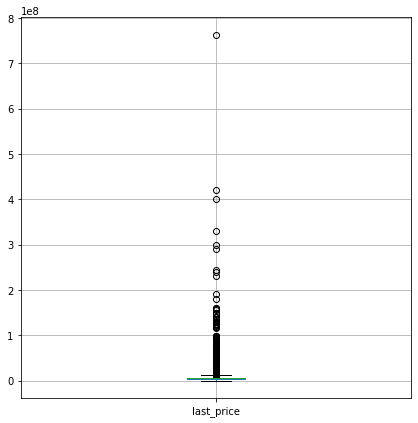

Значений вне нормальных: 2046
Это составляет: 8.7 % от всего количества записей


In [38]:
import matplotlib.pyplot as plt

# Проверим количество выбросов
top_normal = (data['last_price'].quantile(q=0.75) 
              + 1.5 * (data['last_price'].quantile(q=0.75) - data['last_price'].quantile(q=0.25)))

bottom_normal = (data['last_price'].quantile(q=0.25) 
              - 1.5 * (data['last_price'].quantile(q=0.75) - data['last_price'].quantile(q=0.25)))

data .boxplot(column='last_price', figsize=(7, 7))
plt.show()

out_of_normal = (data
                .query('last_price < @bottom_normal | last_price > @top_normal')['last_price']
                .count())

print('Значений вне нормальных:', out_of_normal)
print('Это составляет:', round((out_of_normal/data.shape[0])*100, 1), '% от всего количества записей')

Обширная квартира c `id == 8793` в черте города не может иметь такую низкую цену, значит, мы нашли аномалию. Возможно, продавец указал цену в тысячах рублей. Если домножить имеющееся значение на 1000, получим 12190000 - вполне адекватную цену для квартиры

In [39]:
# Медианное значение стоимости квартир с похожими характеристиками по удаленности от центра и площади:
data.query('8000 < cityCenters_nearest < 11000 & 90 < total_area < 120')['last_price'].median()

12699500.0

In [40]:
# Значит, полученная цена будет адекватной, переведем тысячи в рубли
data.loc[data.index == 8793, 'last_price'] = data.loc[data.index == 8793, 'last_price'] * 1000

**Столбец `ceiling_height`**

Есть неправдоподобно маленькие и очень большие значения, стоит их проверить.

In [41]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Выделяются значения более 20 метров - это уже похоже на опечатки, если разделить их на 10 получим адекватную высоту потолков.

In [42]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, data['ceiling_height']/10)
data['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

Стало лучше, но остались маленькие значения - менее двух метров, такие помещения непригодны для жизни, но выяснить откуда взялись эти значения - не получится, придется удалить эти строки.

Также есть значения 6 и более: скорее, речь идет о пентхаусах, где такая высота возможна, но нужно посмотреть дополнительную информацию об этих объектах.

In [43]:
data.query('ceiling_height >= 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000,30.0,2018-03-16,1,8.0,5,15.3,2,False,...,7.300000,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0
5863,20,5650000,45.0,2018-08-15,1,8.3,16,19.3,14,False,...,8.300000,1,Санкт-Петербург,13069.0,10763.0,0,NaN,1,613.0,14.0
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,False,...,9.100000,2,Санкт-Петербург,14814.0,13610.0,0,NaN,0,NaN,315.0
15743,14,5600000,67.0,2016-11-11,3,8.0,16,41.0,1,False,...,8.000000,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,474.0
17442,0,5350000,54.0,2015-06-16,2,8.0,5,29.0,2,False,...,9.454035,1,Красное Село,24638.0,28062.0,0,NaN,0,NaN,469.0
20264,17,119000000,187.6,2017-07-10,4,6.0,7,147.0,7,False,...,15.600000,0,Санкт-Петербург,26902.0,5605.0,3,484.0,1,305.0,259.0
22309,20,5300000,45.0,2017-09-30,1,10.3,16,15.5,15,False,...,7.878363,0,Санкт-Петербург,36353.0,11936.0,2,440.0,2,450.0,136.0
22869,0,15000000,25.0,2018-07-25,1,10.0,5,14.0,5,True,...,11.000000,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19.0


Реалистичным здесь выглядит только объект с `id 20264`: высокие потолки 6м соответствую большой площади. Остальные объекты странные - высота потолков слишком большая для заявленной площади. Возможно, здесь произошли ошибки при заполнении объявления, думаю, можно удалить объекты с высотой потолков выше 6м.

In [44]:
data = data.query('2 < ceiling_height <= 6')
data['ceiling_height'].describe()

count    23543.000000
mean         2.697252
std          0.220960
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

**Столбец `floors_total`**

По данным Википедии, самый высокий ЖК в Санкт-Петербурге насчитывает 37 этажей. Думаю, что будет логично удалить строки, где количество этажей превышает это число.

In [45]:
data = data.query('floors_total <= 37')
data['floors_total'].describe()

count    23541.000000
mean        10.671679
std          6.580465
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

### Вывод

В ходе предобработки данных выполнены следующие шаги:
1. **Заполнение пропусков**: здесь проще всего заполняются пропуски пользовательских данных (например, количество балконов, парков и водоеомов поблизости), потому что их логику можно проследить. Пропуски в картографических данных оказались невозможно восстановить (например, расстояния до центра и аэропорта).
2. **Изменение типов данных**: требовалось изменить типы данных как для экономии памяти (например, цену объекта и этаж - это целые числа и не имеет смысла хранить их во `float`), так и для дальнейшей обработки (дата размещения)
3. **Устранение дубликатов**: явных дубликатов не обнаружилось, в основном устранение дубликатов требовалось столбцу `locality_name` - в нем были неявные дубликаты, названия одних и тех же населенных пунктов были написаны по-разному, это могло помешать дальнейшему анализу
4. **Устранение аномалий**: аномалии встретились в столбцах `last_price` и `ceiling_height` - часть из них была связана с опечатками, вызванными тем, что эти данные вводятся пользователями вручную. Также были устранены неправдоподобно маленькие и большие значения.

Предобработка данных - важный шаг, позволяющий очистить данные от всего, что может отрицательно повлиять на качество дальнейшего анализа. Выполненная предобработка позволит производить вычисления, исключит ошибки при выполнеии дальнейших шагов.

## Шаг 3. Добавление информации в таблицу

Для дальнейшего исследования добавим следующие столбцы:
- `square_m_price`: цена одного квадратного метра;
- `publication_weekday`: день недели публикации объявления (`0` — понедельник, `1` — вторник и так далее):
- `publication_month`: месяц публикации объявления;
- `publication_year`: год публикации объявления;
- `floor_type`: тип этажа квартиры (значения — `«первый»`, `«последний»`, `«другой»`);
- `city_center_km`: расстояние до центра города в километрах (переведите из `м` в `км` и округлите до целых значений);
- `airport_km`: расстояние до аэропорта в километрах.

In [46]:
# Добавляем цену одного квадратного метра и приводим к целому типу
data['square_m_price'] = data['last_price'] / data['total_area']
data['square_m_price'] = data['square_m_price'].astype(int)


# Добавляем день недели, месяц и год публикации объявления
data['publication_weekday'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year


# Добавляем тип этажа
def floor_tipization(row):
    # Функция делит этажи по группам: "первый", "последний", "другой"
    
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другой'

data['floor_type'] = data.apply(floor_tipization, axis=1)


# Дополнительно придется заполнить пропущенные значения числом 999999, для дальнейшей обработке и анализа
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(value=999999)
data['airports_nearest'] = data['airports_nearest'].fillna(value=999999)
data['parks_nearest'] = data['parks_nearest'].fillna(value=999999)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=999999)
data['days_exposition'] = data['days_exposition'].fillna(value=999999)


# Переводим в километры и округляем до целого расстояния до центра города и до аэропорта
data['city_center_km'] = data['cityCenters_nearest'] / 1000
data['city_center_km'] = data['city_center_km'].astype(int)
data['airport_km'] = data['airports_nearest'] / 1000
data['airport_km'] = data['airport_km'].astype(int)

In [47]:
# Тестирую метод 
data['test_month'] = data['first_day_exposition'].astype('datetime64[M]')
data['test_month']

0       2019-03-01
1       2018-12-01
2       2015-08-01
3       2015-07-01
4       2018-06-01
           ...    
23694   2017-03-01
23695   2018-01-01
23696   2018-02-01
23697   2017-03-01
23698   2017-07-01
Name: test_month, Length: 23541, dtype: datetime64[ns]

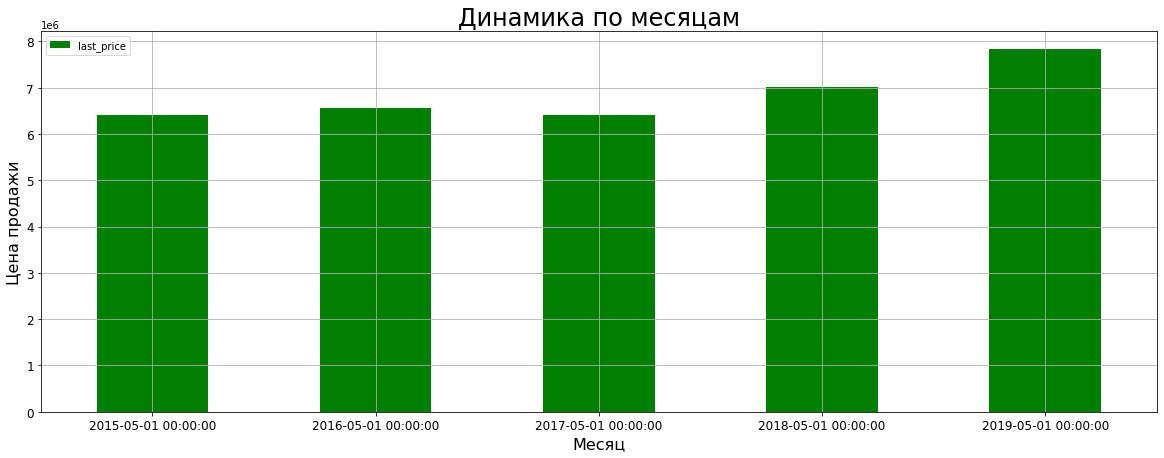

In [48]:
import matplotlib.pyplot as plt

mybar = (data
    .query('publication_month == 5')
    .pivot_table(index='test_month', values='last_price')
    .plot(grid=True, 
          kind='bar',
          figsize=(20, 7), 
          fontsize=12,
          color=['green', 'blue', 'cyan']
         )
)

mybar.set_title('Динамика по месяцам', fontsize=24)
mybar.set_xlabel('Месяц', fontsize=16)
mybar.set_ylabel('Цена продажи', fontsize=16)
plt.xticks(rotation=0,
#           ha='right'
          )
plt.show()

## Шаг 4. Исследовательский анализ данных

### 4.1 Изучение параметров объектов

В этом разделе изучим параметры датасета, построим гистограммы, опишем наблюдения.

**Общая площадь**

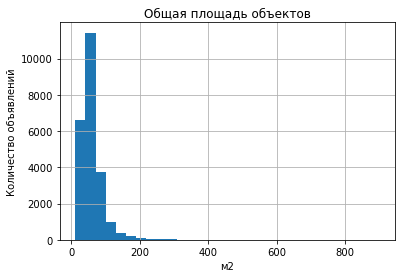

Топ-10 квартир с наибольшей площадью:


19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64

In [49]:
import matplotlib.pyplot as plt

plt.hist(data['total_area'], bins=30)
plt.title('Общая площадь объектов')
plt.xlabel('м2')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

print('Топ-10 квартир с наибольшей площадью:')
data['total_area'].sort_values(ascending=False).head(10)

Видно, что большинство квартир имеют площадь менее 200 м2, более крупных объектов единицы, и только они попали в топ. Плохо видно распределение объектов небольши площадей. Посмотрим, как выглядит распределение квартир менее 200 м2.

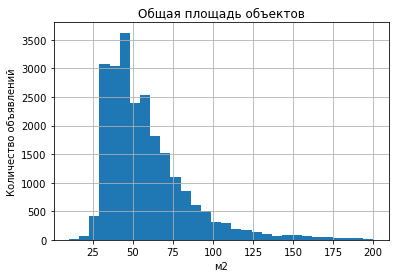

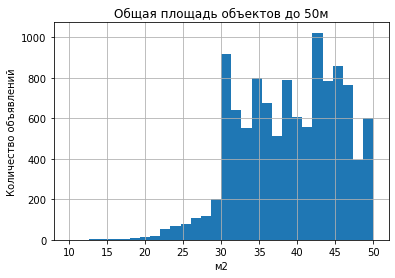

In [50]:
plt.hist(data['total_area'], bins=30, range=(10, 200))
plt.title('Общая площадь объектов')
plt.xlabel('м2')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

plt.hist(data['total_area'], bins=30, range=(10, 50))
plt.title('Общая площадь объектов до 50м')
plt.xlabel('м2')
plt.ylabel('Количество объявлений')
plt.grid(True)

Большинство квартир расположились в диапазоне 25-50 м2, укрупнив масштаб, находим пик где-то на 42-43 м2. Действительно, это довольно распространенная площадь квартир. Получается, самые популярные объекты относительно небольшие.

**Жилая площадь**

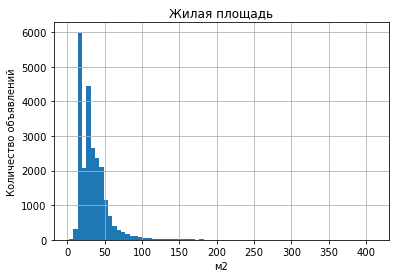

Топ-10 объектов с наибольшей жилой площадью:


,living_area,total_area
19540,409.700000,900.0
5358,409.000000,590.0
3117,360.387312,631.0
12401,347.500000,495.0
4237,332.000000,517.0
12859,322.300000,631.2
660,312.500000,483.9
8018,301.500000,507.0
14088,300.000000,402.0
5893,285.568393,500.0


In [51]:
plt.hist(data['living_area'], bins=70)
plt.title('Жилая площадь')
plt.xlabel('м2')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

print('Топ-10 объектов с наибольшей жилой площадью:')
data[['living_area', 'total_area']].sort_values(by='living_area', ascending=False).head(10)

Замечу, что большая общая площадь не всегда означает большую жилую площадь. Но это на крупнейших объектах.
Интересно, как обстоят дела в меньших квартирах до 100 м2.

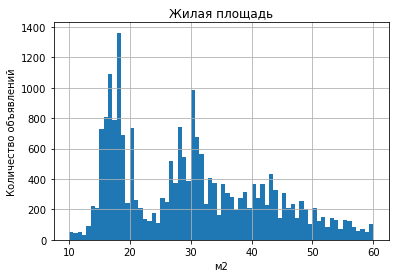

Топ-10 объектов с наибольшей жилой площадью:


,living_area,total_area
1320,59.969363,105.0
12483,59.969363,105.0
21992,59.969363,105.0
3856,59.969363,105.0
18521,59.969363,105.0
10888,59.900000,97.4
20480,59.900000,87.1
11673,59.800000,88.6
14586,59.800000,165.2
22105,59.800000,165.2


In [52]:
plt.hist(data['living_area'], bins=70, range=(10, 60))
plt.title('Жилая площадь')
plt.xlabel('м2')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

print('Топ-10 объектов с наибольшей жилой площадью:')
data.query('living_area < 60')[['living_area', 'total_area']].sort_values(by='living_area', ascending=False).head(10)

Ситуация примерно такая же - большая общая площадь не означает большую жилую площадь. 
Могу предположить, что это связано с заполнением пропусков расчетным значением.

Также можно отметить, что даже в выборке в распределении значений наблюдается несколько пиков - примерно в районе 17 и 30 м2.

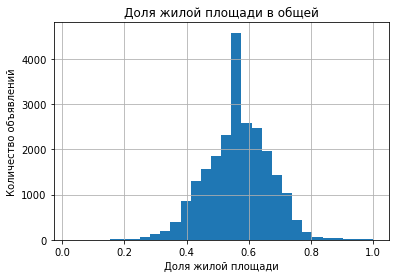

In [53]:
plt.hist(data['living_area']/data['total_area'], bins=30)
plt.title('Доля жилой площади в общей')
plt.xlabel('Доля жилой площади')
plt.ylabel('Количество объявлений')
plt.grid(True)

В распределении значений доли жилой площади в общей площади квартиры наблюдаем распределение, стремящееся к нормальному, с очень выделяющимся пиком между 50 и 60 %. Предположу, что он возник при заполнении пропусков расчетным значением.

**Площадь кухни**

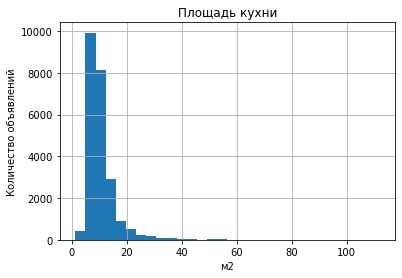

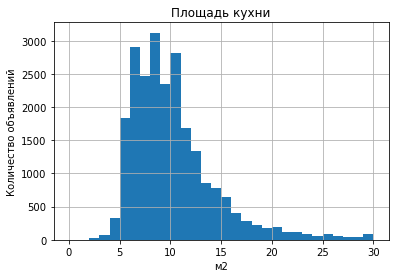

Топ-10 квартир с наибольшей площадью кухни:
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
15016     87.537363
10867     87.200000
9826      86.504422
492       77.000000
Name: kitchen_area, dtype: float64


In [54]:
plt.hist(data['kitchen_area'], bins=30)
plt.title('Площадь кухни')
plt.xlabel('м2')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

plt.hist(data['kitchen_area'], bins=30, range=(0, 30))
plt.title('Площадь кухни')
plt.xlabel('м2')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

print('Топ-10 квартир с наибольшей площадью кухни:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

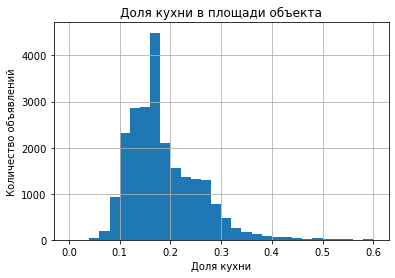

In [55]:
plt.hist(data['kitchen_area']/data['total_area'], bins=30, range=(0, 0.6))
plt.title('Доля кухни в площади объекта')
plt.xlabel('Доля кухни')
plt.ylabel('Количество объявлений')
plt.grid(True)

Дополнительно рассмотрено распределение по по доле кухни в общей площади. Интересно, что несмотря на площадь, чаще всего кухни занимают где-то 10-20% квартиры, пик около 15%.

**Цена объекта**

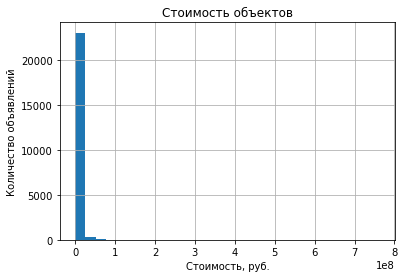

Топ-10 объектов с наибольшей стоимостью:
       last_price  total_area    locality_name
12971   763000000       400.0  Санкт-Петербург
19540   420000000       900.0  Санкт-Петербург
14706   401300000       401.0  Санкт-Петербург
1436    330000000       190.0  Санкт-Петербург
15651   300000000       618.0  Санкт-Петербург
22831   289238400       187.5  Санкт-Петербург
16461   245000000       285.7  Санкт-Петербург
13749   240000000       410.0  Санкт-Петербург
5893    230000000       500.0  Санкт-Петербург
8900    190870000       268.0  Санкт-Петербург

Топ-10 объектов с наименьшей стоимостью:
       last_price  total_area                     locality_name
17456      430000        30.4                            Сланцы
14911      430000        54.0             посёлок станции Свирь
16274      440000        40.0                деревня Старополье
5698       450000        42.0  посёлок городского типа Будогощь
9581       450000        43.4                деревня Старополье
16219      45000

In [56]:
plt.hist(data['last_price'], bins=30)
plt.title('Стоимость объектов')
plt.xlabel('Стоимость, руб.')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

print('Топ-10 объектов с наибольшей стоимостью:')
print(data[['last_price', 'total_area', 'locality_name']].sort_values(by='last_price', ascending=False).head(10))
print()
print('Топ-10 объектов с наименьшей стоимостью:')
print(data[['last_price', 'total_area', 'locality_name']].sort_values(by='last_price', ascending=True).head(10))

По стоимости квартир распределения почти не видно, потому что есть небольшое количество очень дорогих вариантов.
Ограничим выборку для гистограммы межквартильным распределением.

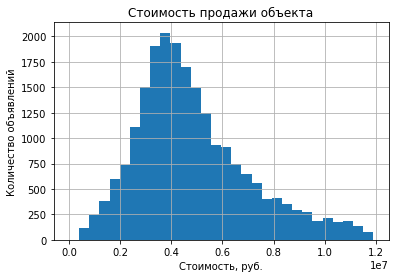

In [57]:
# Это значение получилось меньше 0, оно не пригодится для гистограммы
lower_edge = (data['last_price'].quantile(q=0.25) 
              - 1.5 * (data['last_price'].quantile(q=0.75) - data['last_price'].quantile(q=0.25)))

upper_edge = (data['last_price'].quantile(q=0.75) 
              + 1.5 * (data['last_price'].quantile(q=0.75) - data['last_price'].quantile(q=0.25)))

plt.hist(data['last_price'], bins=30, range=(0, upper_edge))
plt.title('Стоимость продажи объекта')
plt.xlabel('Стоимость, руб.')
plt.ylabel('Количество объявлений')
plt.grid(True)

Видим, что в пределах межквартильного размаха наиболее распространена стоимость квартир 3-5 млн.рублей.
В таком масштабе распределение значений приближается к нормальному.

**Количество комнат**

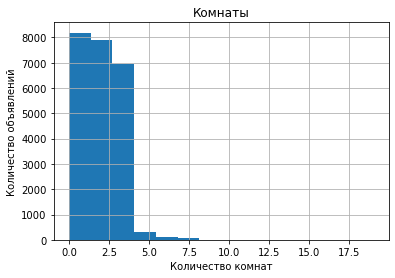

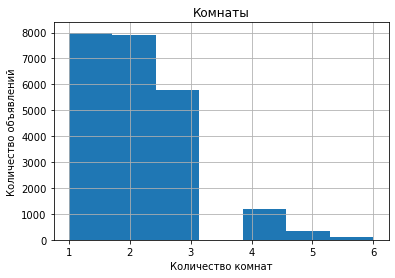

Топ-10 объектов с наибольшим числом комнат:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18119    10
18891    10
Name: rooms, dtype: int64


In [58]:
plt.hist(data['rooms'], bins=14)
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

plt.hist(data['rooms'], bins=7, range=(1,6))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

print('Топ-10 объектов с наибольшим числом комнат:')
print(data['rooms'].sort_values(ascending=False).head(10))

Наиболее распространены "однушки" и "двушки", также довольно в продаже довольно большая доля трехкомнатных квартир. Остальных значительно меньше, квартир, с более чем 6-ю комнатами - меньше всего, можно сказать, что это единичные значения.

In [59]:
# Действительно, во всем датасете всего 90 квартир с числом комнат больше 6
data.query('rooms > 6')['rooms'].count()

90

**Высота потолков**

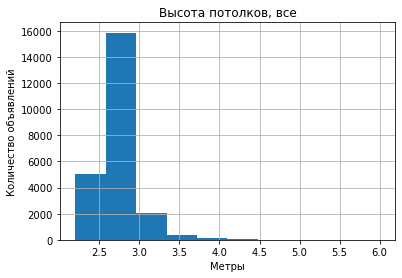

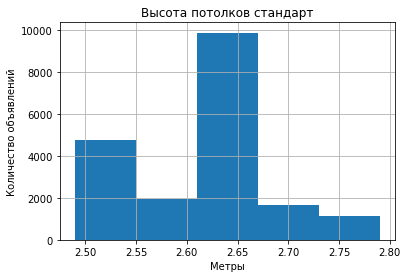

Наибольшие по высоте потолков объекты:
20264    6.0
21227    5.8
1388     5.6
7578     5.5
12628    5.3
1026     5.3
464      5.2
1053     5.0
21923    4.9
2802     4.8
Name: ceiling_height, dtype: float64


In [60]:
# Посмотрим, что происходит по всем значениям, помня, что сохранили значения до 6м
plt.hist(data['ceiling_height'], bins=10)
plt.title('Высота потолков, все')
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

# Сделаем выборку стандартных высот потолков, чтобы увидеть какие из них наиболее распространены
plt.hist(data.query('(ceiling_height > 2.48) & (ceiling_height < 2.8)')['ceiling_height'], bins=5)
plt.title('Высота потолков стандарт')
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

print('Наибольшие по высоте потолков объекты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Самые распространенные высоты потолков стандартные - от 2.5 и 2.65 метров, что также соответствует СНИП.

**Этаж квартиры и его тип, общая этажность дома**

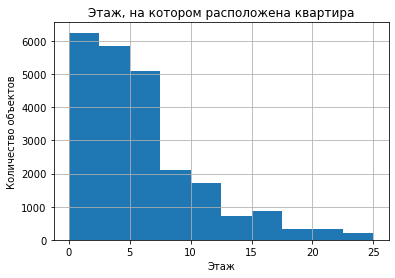

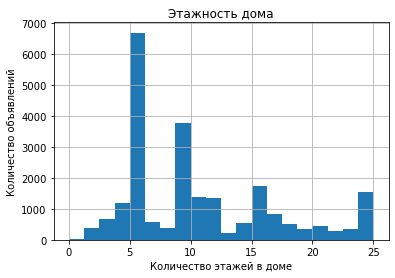

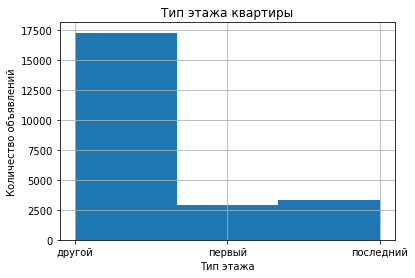

In [61]:
# Ознакомимся с распределением этажа квартиры и общей этажности дома

# Ограничим этаж и этажность 25 этажами, так как зданий выше очень мало
plt.hist(data['floor'], bins=10, range=(0, 25))
plt.title('Этаж, на котором расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Количество объектов')
plt.grid(True)

plt.show()

plt.hist(data['floors_total'], bins=20, range=(0, 25))
plt.title('Этажность дома')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

plt.hist(data['floor_type'], bins=3)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.grid(True)

Большинство квартир в объявлениях распложены на нижних этажах - ниже 5-го, квартиры на более высоких этажах выставляются на продажу реже. 

При этом наиболее распространенная этажность 5-7 и 9 этажей, что соответствует стандартным многоэтажкам. Зданий выше 9 этажей меньше, однако возникают небольшие пики в районе 16 и 25 этажей. Думаю, это может быть связано с тем, что в новых домах этажей больше чем, в старом фонде.

Логично, что большинство квартир расположены не на первом и последним этажах.

**Расстояние до центра города в метрах**

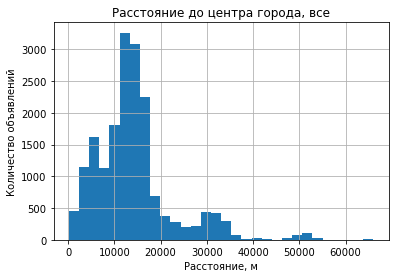

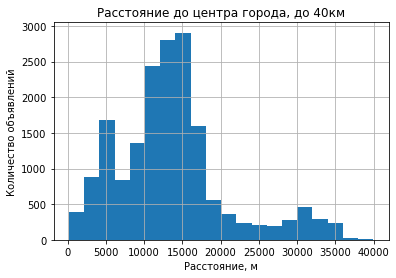

In [62]:
plt.hist(data.query('cityCenters_nearest != 999999')['cityCenters_nearest'], bins=30)
plt.title('Расстояние до центра города, все')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

plt.hist(data.query('cityCenters_nearest < 40000')['cityCenters_nearest'], bins=20)
plt.title('Расстояние до центра города, до 40км')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество объявлений')
plt.grid(True)

Большинство квартир расположены на расстоянии 10-15 км от центра, что соответствует спальным районам и ближайшим пригородам.

Наблюдается небольшой пик в районе 5км, сюда могли попасть объекты из старых спальных районов, оказавшиеся относительно близко к центру с разрастанием города.

Относительно маленький пик наблюдается в районе 30км от центра, сюда могли войти объекты из населенных пунктов города и области, где в последние годы идет активное строительство.

In [63]:
plt.show()

print('Топ-10 самых удаленных от центра объектов:')
print((data
      .query('cityCenters_nearest != 999999')[['cityCenters_nearest', 'floors_total', 'last_price']]
      .sort_values(by='cityCenters_nearest', ascending=False).head(10)))
print()
print('Топ-10 самых близких к центру объектов:')
print((data
       .query('cityCenters_nearest != 999999')[['cityCenters_nearest', 'floors_total', 'last_price']]
       .sort_values(by='cityCenters_nearest', ascending=True).head(10)))

Топ-10 самых удаленных от центра объектов:
       cityCenters_nearest  floors_total  last_price
9640               65968.0             5     4200000
5340               65952.0             5     3600000
577                65764.0             5     4000000
20746              65105.0             4     3300000
5218               64857.0             4     3650000
18884              62706.0             3     3600000
2974               62454.0             3     3200000
16569              61495.0             5     3200000
23123              60223.0             2     1800000
4441               59626.0             3     2300000

Топ-10 самых близких к центру объектов:
       cityCenters_nearest  floors_total  last_price
13694                181.0             5    31099000
1182                 208.0             7     5800000
8614                 215.0             5    10990000
1934                 287.0             5     9590000
20873                291.0             7    11500000
7726           

Картина самых удаленных объектов похожа на характерную для области застройку.

В центре тоже есть дома с такой этажностью, хоть их и немного, поэтому можно принять за корректные.

**Расстояние до ближайшего аэропорта**

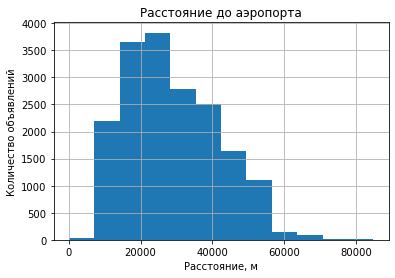

In [64]:
plt.hist(data.query('airports_nearest != 999999')['airports_nearest'], bins=12)
plt.title('Расстояние до аэропорта')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество объявлений')
plt.grid(True)

Пик расположился на 17-23км, что соответствует расположению квартиры в черте города.

Малое количество значений в самом начале графика связано с тем, что домов, расположенных близко к аэропорту никогда не будет много, аэропорты обычно располагаются вдали от жилых застроек.

Снижение количества после объектов, расположенных далее 60 км связано с тем, что зачастую они не были указаны в таблице.

**Расстояние до ближайшего парка**

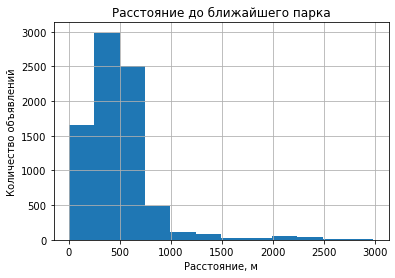

In [65]:
plt.hist(data.query('parks_nearest != 999999')['parks_nearest'], bins=12)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество объявлений')
plt.grid(True)

В основном те объекты, рядом с которыми есть парки, расположены на расстоянии 250-500 (до 750) метров от них. Интересно, что после 750 м объектов резко становится меньше. Возможно, рядом с домами мало парков, но это странно для Санкт-Петербурга, где парков как таковых очень много. Есть предположение, что продавцы не всегда указывали наличие парков поблизости, если они расположены дальше 750 метров от дома, но его не проверить в рамках данного исследования.

**День и месяц публикации объявления**

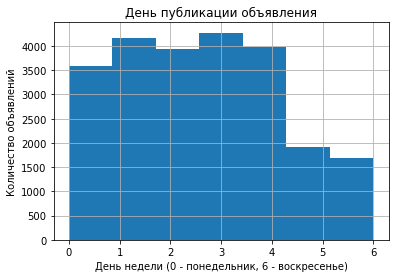

In [66]:
plt.hist(data['publication_weekday'], bins=7)
plt.title('День публикации объявления')
plt.xlabel('День недели (0 - понедельник, 6 - воскресенье)')
plt.ylabel('Количество объявлений')
plt.grid(True)

Объявления о продаже квартир публикуются на буднях в два раза чаще, чем на выходных. Это может быть связано, например, с тем, что часть объявлений выставляют сотрудники агенств недвижимости, работающие на стандартной "пятидневке".

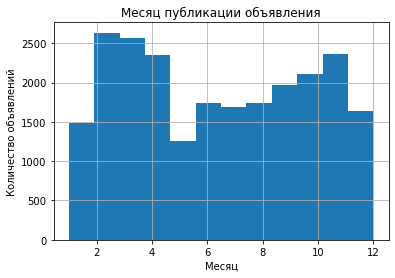

In [67]:
plt.hist(data['publication_month'], bins=12)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.grid(True)

Распределение объявлений ожидаемое:
- В январе объявлений мало из-за новогодних праздников;
- Больше всего объявлений публикуются в феврале-апреле;
- В мае происходит резкий спад, опять же из-за праздников;
- В летние месяцы публикаций становится больше, чем в мае, причем распределение примерно одинаково для каждого из них;
- Осенью количество публикаций растет и достигает пикового значения в ноябре;
- В декабре снова происходит спад, примерно на уровень лета.

Распределение похоже на обычное для продаж в течение года.

### 4.2 Скорость продажи квартир

В этом разделе изучим, как быстро продавались квартиры, построим гистограммы, опишем наблюдения.

Будем рассматривать столбец `days_exposition`, который показывает, сколько дней было размещено каждое объявление.

Имеется большой разброс значений и плохо видно распределение на участке с наибольшим количеством объявлений.
Чтобы посмотреть распределение вблизи, ограничим диаграмму верхним + 1.5 * IQR значением межквартильного разброса
Теперь построим гистограмму

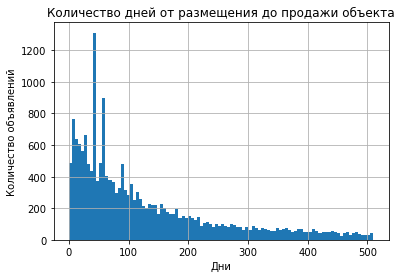

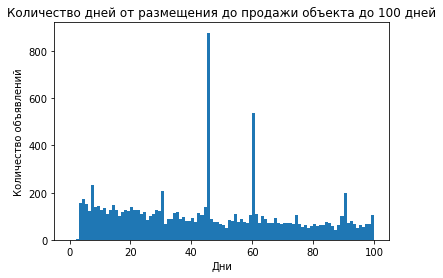

count    20374.000000
mean       180.774075
std        219.792085
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Нижняя граница нормальных значений:  -234.0
Верхняя граница нормальных значений:  510.0


In [68]:
days_lower_edge = (data.query('days_exposition != 999999')['days_exposition'].quantile(q=0.25) 
                  - 1.5 * (data.query('days_exposition != 999999')['days_exposition'].quantile(q=0.75) 
                           - data.query('days_exposition != 999999')['days_exposition'].quantile(q=0.25)))

days_upper_edge = (data.query('days_exposition != 999999')['days_exposition'].quantile(q=0.75) 
                  + 1.5 * (data.query('days_exposition != 999999')['days_exposition'].quantile(q=0.75) 
                           - data.query('days_exposition != 999999')['days_exposition'].quantile(q=0.25)))

plt.hist(data.query('days_exposition != 999999')['days_exposition'], bins=100, range=(0, days_upper_edge))
plt.title('Количество дней от размещения до продажи объекта')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.show()

# Укрупним масштаб и посмотрим на распределение в области, где сосредоточены наибольшее количество объявлений
plt.hist(data.query('days_exposition != 999999')['days_exposition'], bins=100, range=(0, 100))
plt.title('Количество дней от размещения до продажи объекта до 100 дней')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')

plt.show()

# Изучаем характеристики распределения значений скорости продажи
print(data.query('days_exposition != 999999')['days_exposition'].describe())
print()
print('Нижняя граница нормальных значений: ', days_lower_edge)
print('Верхняя граница нормальных значений: ', days_upper_edge)

Из гистограмм видно, что наиболее часто квартиры продаются за 42-60 дней (1.5-2 месяца), причем чаще всего сделки заключаются именно за эти крайние значения, между ними наблюдается спад.

Среднее время продажи квартиры/дома - 181 день, медианное - 95 дней. Такая разница между средним и медианным значением говорит о том, что хотя большинство значений сосредоточены в пределах нормальных, есть отдельные очень большие значения. Действительно, самый длительный срок от публикации объявления до его снятия - 1580 дней (это примерно 4.5 года).

Быстрыми можно считать продажи в пределах 45 дней (ниже 1-го квартиля), сравнительно долгими - более 231 дня, а необычно долгими - свыше 510 дней (верхняя граница нормальных значений) - это порядка полутора лет, действительно, срок достаточно длительный.

### 4.3 Факторы, влияющие на стоимость объекта

В этом разделе изучим, как различные факторы влияют на стоимость объектов.
Для этого построим графики на основе сводных таблиц.

**Зависимость цены от общей площади объекта**

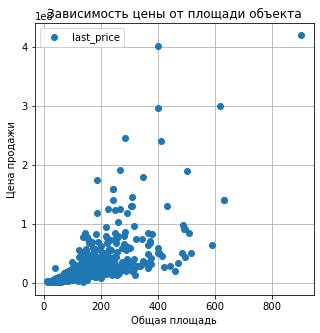

Корреляция цены и общей площади объекта:
            last_price  total_area
last_price    1.000000    0.653727
total_area    0.653727    1.000000 



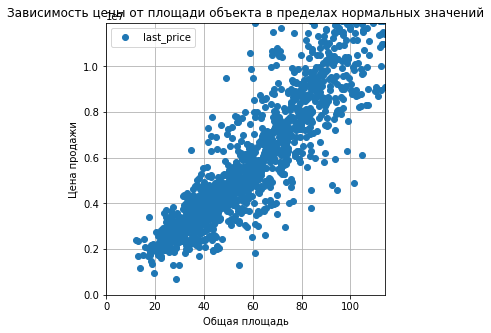

Корреляция цены и общей площади объекта в пределах нормальных значений:
            last_price  total_area
last_price     1.00000     0.69466
total_area     0.69466     1.00000


In [69]:
# Рассмотрим зависимость цены от общей площади на всем диапазоне значений
(data
    .pivot_table(index='total_area', values='last_price')
    .plot(grid=True, 
          style='o', 
          figsize=(5, 5), 
          title='Зависимость цены от площади объекта',
          xlabel='Общая площадь',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция цены и общей площади объекта:')
print(data.pivot_table(index=data.index, values=['total_area', 'last_price']).corr(), '\n')


# Рассмотрим ту же зависимость в пределах нормальных значений
area_upper_edge = (data['total_area'].quantile(q=0.75) 
              + 1.5 * (data['total_area'].quantile(q=0.75) - data['total_area'].quantile(q=0.25)))

price_upper_edge = (data['last_price'].quantile(q=0.75) 
              + 1.5 * (data['last_price'].quantile(q=0.75) - data['last_price'].quantile(q=0.25)))

(data
    .pivot_table(index='total_area', values='last_price')
    .plot(grid=True, 
          style='o', 
          figsize=(5, 5), 
          xlim=([0, area_upper_edge]), 
          ylim=([0, price_upper_edge]),
          title='Зависимость цены от площади объекта в пределах нормальных значений',
          xlabel='Общая площадь',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция цены и общей площади объекта в пределах нормальных значений:')
print(data
      .query('total_area <= @area_upper_edge & last_price <= @price_upper_edge')
      .pivot_table(index=data.query('total_area <= @area_upper_edge & last_price <= @price_upper_edge').index,
                   values=['total_area', 'last_price']).corr())

В целом можно сказать, что цена довольно сильно зависит от площади. Но на всем множестве значений эта зависимость немного слабее, можно предположить, что здесь на цену дополнительно влияют другие факторы (например, удаленность от центра).

**Зависимость цены от жилой площади**

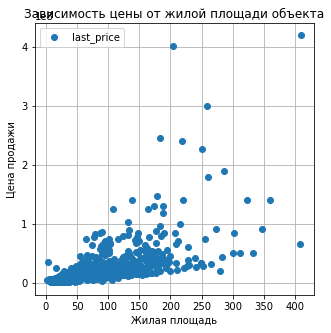

Корреляция цены и жилой площади объекта:
             last_price  living_area
last_price     1.000000     0.585729
living_area    0.585729     1.000000 



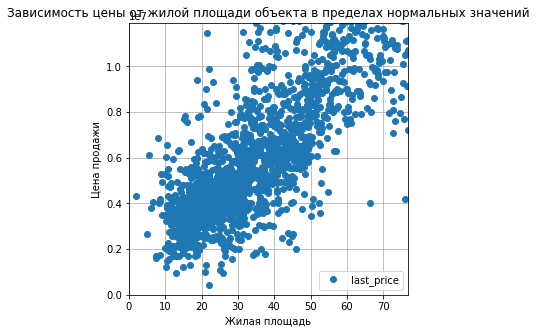

Корреляция цены и общей площади объекта в пределах нормальных значений:
             last_price  living_area
last_price     1.000000     0.573593
living_area    0.573593     1.000000


In [70]:
# Рассмотрим зависимость цены от жилой площади на всем диапазоне значений
(data
    .pivot_table(index='living_area', values='last_price')
    .plot(grid=True, 
          style='o', 
          figsize=(5, 5), 
          title='Зависимость цены от жилой площади объекта',
          xlabel='Жилая площадь',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция цены и жилой площади объекта:')
print(data.pivot_table(index=data.index, values=['living_area', 'last_price']).corr(), '\n')


# Рассмотрим ту же зависимость в пределах нормальных значений
living_upper_edge = (data['living_area'].quantile(q=0.75) 
              + 1.5 * (data['living_area'].quantile(q=0.75) - data['living_area'].quantile(q=0.25)))

(data
    .pivot_table(index='living_area', values='last_price')
    .plot(grid=True, 
          style='o', 
          figsize=(5, 5), 
          xlim=([0, living_upper_edge]), 
          ylim=([0, price_upper_edge]),
          title='Зависимость цены от жилой площади объекта в пределах нормальных значений',
          xlabel='Жилая площадь',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция цены и общей площади объекта в пределах нормальных значений:')
print(data
      .query('living_area <= @living_upper_edge & last_price <= @price_upper_edge')
      .pivot_table(index=data.query('living_area <= @living_upper_edge & last_price <= @price_upper_edge').index,
                   values=['living_area', 'last_price']).corr())

Схожая с общей площадью ситуация - в пределах нормальных значений зависимоть цены от жилой площади несколько выше. Возможно, более дорогие объекты предлагают какие-то дополнительные "бонусы", повышающие комфорт жилья и, следовательно влияющие на стоимость.

**Зависимость цены от площади кухни**

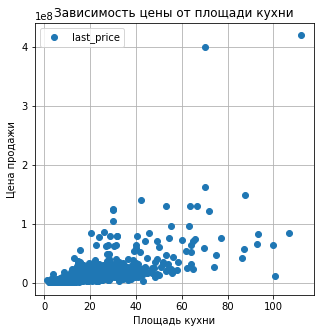

Корреляция цены и площади кухни:
              kitchen_area  last_price
kitchen_area      1.000000    0.514739
last_price        0.514739    1.000000 



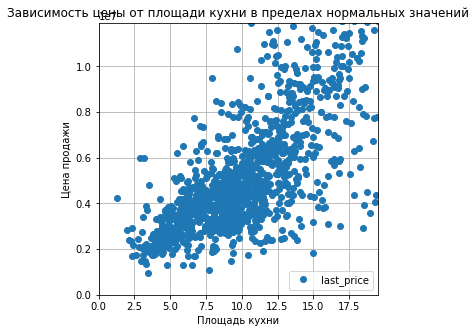

Корреляция цены и площади кухни в пределах нормальных значений:
              kitchen_area  last_price
kitchen_area      1.000000    0.509937
last_price        0.509937    1.000000


In [71]:
# Рассмотрим зависимость цены от площади кухни на всем диапазоне значений
(data
    .pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, 
          style='o', 
          figsize=(5, 5), 
          title='Зависимость цены от площади кухни',
          xlabel='Площадь кухни',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция цены и площади кухни:')
print(data.pivot_table(index=data.index, values=['kitchen_area', 'last_price']).corr(), '\n')


# Рассмотрим ту же зависимость в пределах нормальных значений
kitchen_upper_edge = (data['kitchen_area'].quantile(q=0.75) 
              + 1.5 * (data['kitchen_area'].quantile(q=0.75) - data['kitchen_area'].quantile(q=0.25)))

(data
    .pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, 
          style='o', 
          figsize=(5, 5), 
          xlim=([0, kitchen_upper_edge]), 
          ylim=([0, price_upper_edge]),
          title='Зависимость цены от площади кухни в пределах нормальных значений',
          xlabel='Площадь кухни',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция цены и площади кухни в пределах нормальных значений:')
print(data
      .query('kitchen_area <= @kitchen_upper_edge & last_price <= @price_upper_edge')
      .pivot_table(index=data.query('kitchen_area <= @kitchen_upper_edge & last_price <= @price_upper_edge').index,
                   values=['kitchen_area', 'last_price']).corr())

Площадь кухни тоже в значительной степени влияет на стоимость квартиры, немного меньше, чем площадь жилой зоны и намного меньше, чем общий метраж.

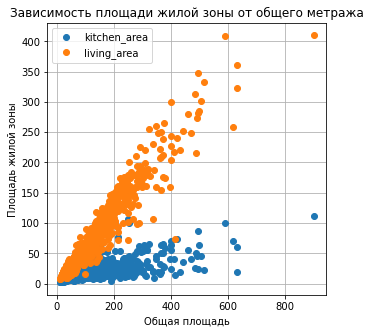

Корреляция общей площади и жилой площади:
              kitchen_area  living_area  total_area
kitchen_area      1.000000     0.502405    0.660276
living_area       0.502405     1.000000    0.946244
total_area        0.660276     0.946244    1.000000 



In [72]:
# Рассмотрим зависимость площади жилой зоны от площади кухни
(data
    .pivot_table(index='total_area', values=['living_area', 'kitchen_area'])
    .plot(grid=True, 
          style='o', 
          figsize=(5, 5), 
          title='Зависимость площади жилой зоны от общего метража',
          xlabel='Общая площадь',
          ylabel='Площадь жилой зоны')
)

plt.show()

print('Корреляция общей площади и жилой площади:')
print(data.pivot_table(index=data.index, values=['total_area', 'living_area', 'kitchen_area']).corr(), '\n')

Вполне логично, что большая по площади квартира будет иметь более обширную жилую зону и, зачастую, кухню. Поэтому могу предположить, что эти параметры не влияют на стоимость квартиры сами по себе, так как идут "комплектом" к общему метражу.

**Зависимость цены от количества комнат**

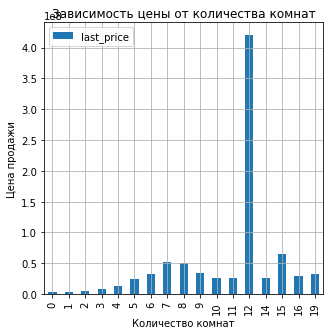

Корреляция цены и количества комнат:
            last_price     rooms
last_price    1.000000  0.363229
rooms         0.363229  1.000000 



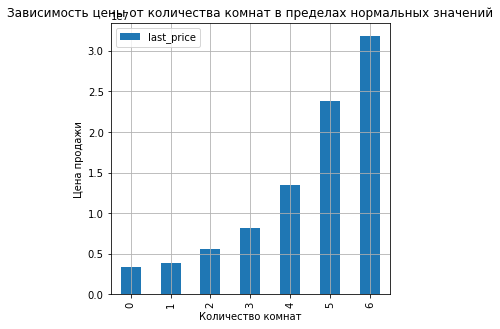

Корреляция цены и количества комнат в пределах нормальных значений:
            last_price     rooms
last_price    1.000000  0.451639
rooms         0.451639  1.000000


In [73]:
# Рассмотрим зависимость цены от количества комнат на всем диапазоне значений
(data
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, 
          kind='bar',
          style='o', 
          figsize=(5, 5), 
          title='Зависимость цены от количества комнат',
          xlabel='Количество комнат',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция цены и количества комнат:')
print(data.pivot_table(index=data.index, values=['rooms', 'last_price']).corr(), '\n')


# Рассмотрим ту же зависимость в пределах нормальных значений
rooms_upper_edge = (data['rooms'].quantile(q=0.75) 
              + 1.5 * (data['rooms'].quantile(q=0.75) - data['rooms'].quantile(q=0.25)))

(data
    .query('rooms <= @rooms_upper_edge')
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, 
          kind='bar',
          style='o', 
          figsize=(5, 5), 
          title='Зависимость цены от количества комнат в пределах нормальных значений',
          xlabel='Количество комнат',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция цены и количества комнат в пределах нормальных значений:')

print(data
      .query('rooms <= @rooms_upper_edge & last_price <= @price_upper_edge')
      .pivot_table(index=data.query('rooms <= @rooms_upper_edge & last_price <= @price_upper_edge').index, 
                   values=['rooms', 'last_price']).corr())

В целом зависимость цены от количества комнат не очень высокая, при этом в зоне нормальных значений эта зависимость выше, потому что в объектах, попадающих в эту область большее количество комнат означает большую площадь. 

Наблюдается очень большой выброс в стоимостии 12-комнатных квартир, интересно, что там происходит.

In [74]:
data.query('rooms == 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_m_price,publication_weekday,publication_month,publication_year,floor_type,city_center_km,airport_km,test_month
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,False,...,318.0,106.0,466666,2,12,2017,последний,7,30,2017-12-01


Пик создала одна очень дорогая квартира.

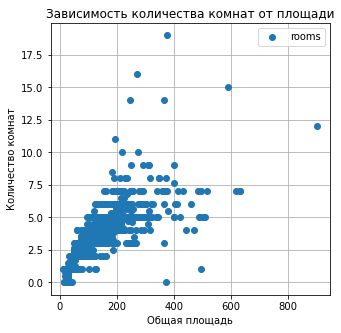

Корреляция количества комнат общей площади и жилой площади: 0.7587033093715346


In [75]:
# Рассмотрим зависимость количества комнат от общей площади
(data
    .pivot_table(index='total_area', values='rooms')
    .plot(grid=True, 
          style='o', 
          figsize=(5, 5), 
          title='Зависимость количества комнат от площади',
          xlabel='Общая площадь',
          ylabel='Количество комнат')
)

plt.show()

print('Корреляция количества комнат общей площади и жилой площади:',
      data['total_area'].corr(data['rooms']))

Логично, что увеличение площади квартиры зачастую ведет к увеличению количества комнат. Но так происходит не всегда, обращаем внимание на горизонтальные скопления на графике - это объекты, разные по площади, но с одним и тем же количеством комнат. Такие объекты снижают зависимость количества комнат на цену.

**Зависимость цены объекта от типа этажа, на котором расположена квартира**

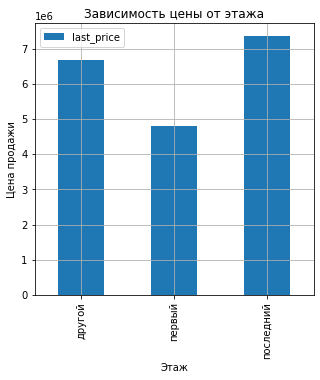

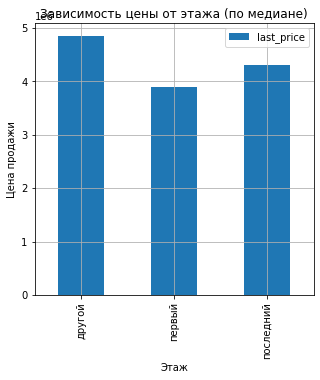

In [76]:
# Код без группировки по медиане
(data
    .pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, 
          kind='bar',
          style='o', 
          figsize=(5, 5), 
          title='Зависимость цены от этажа',
          xlabel='Этаж',
          ylabel='Цена продажи')
)

plt.show()

# Значения сгруппированы по медиане
(data
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, 
          kind='bar',
          style='o', 
          figsize=(5, 5), 
          title='Зависимость цены от этажа (по медиане)',
          xlabel='Этаж',
          ylabel='Цена продажи')
)

plt.show()

Видим из диаграммы, что квартиры с самой низкой ценой расположены на первом этаже, а самые дорогие - на последнем.

**Зависимость цены объекта от даты размещения**

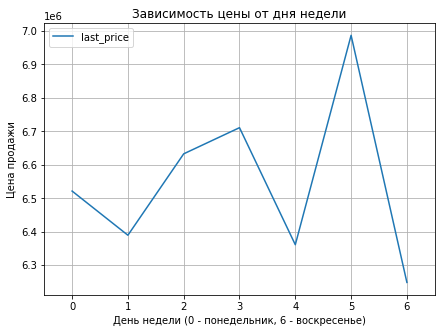

Корреляция дня недели публикации объявления и цены: 0.0014032063747691289


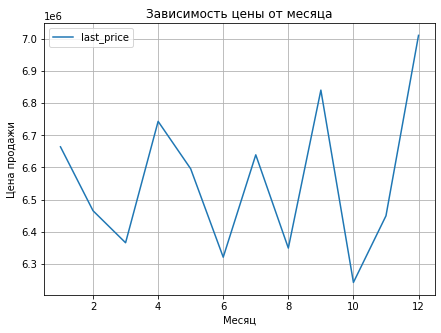

Корреляция месяца публикации объявления и цены: 0.0027681852819238634


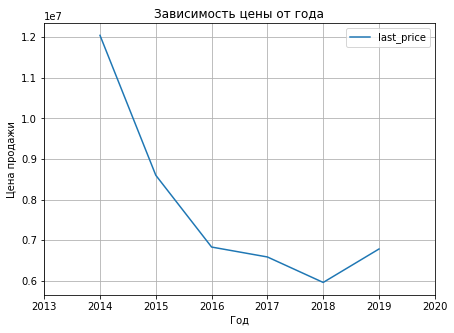

Корреляция года публикации объявления и цены: -0.04280713465281789


In [77]:
# Рассмотрим зависимость цены объекта от дня недели публикации объявления
(data
    .pivot_table(index='publication_weekday', values='last_price')
    .plot(grid=True, 
          figsize=(7, 5), 
          xlim=([-0.5, 6.5]),
          title='Зависимость цены от дня недели',
          xlabel='День недели (0 - понедельник, 6 - воскресенье)',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция дня недели публикации объявления и цены:',
      data['last_price'].corr(data['publication_weekday']))


# Рассмотрим зависимость цены объекта от месяца публикации объявления
(data
    .pivot_table(index='publication_month', values='last_price')
    .plot(grid=True,  
          figsize=(7, 5), 
          xlim=([0.5, 12.5]),
          title='Зависимость цены от месяца',
          xlabel='Месяц',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция месяца публикации объявления и цены:',
      data['last_price'].corr(data['publication_month']))


# Рассмотрим зависимость цены объекта от года публикации объявления
(data
    .pivot_table(index='publication_year', values='last_price')
    .plot(grid=True, 
          figsize=(7, 5), 
          xlim=([2013, 2020]),
          title='Зависимость цены от года',
          xlabel='Год',
          ylabel='Цена продажи')
)

plt.show()

print('Корреляция года публикации объявления и цены:',
      data['last_price'].corr(data['publication_year']))

Объявления с самыми высокими ценами публикуются в субботу, с самыми низкими - в воскресенье.
Самые дорогие объявления публиковались в декабре, сентябре и апреле, самые дешевые - октябре.

Хотя в разные дни недели и месяцы объекты цена варьируется, зависимости между цено и этими параметрами практически нет, об этом говорит корреляция между ценой и датой, стремящаяся к 0.

Между годом публикации объявления и ценой зависимость тоже почти отсутствует, однако отмечу, что она отрицательная. Это подтверждает и график - с 2014 по 2018 годы цены снижались и только к 2019 вновь начали расти.

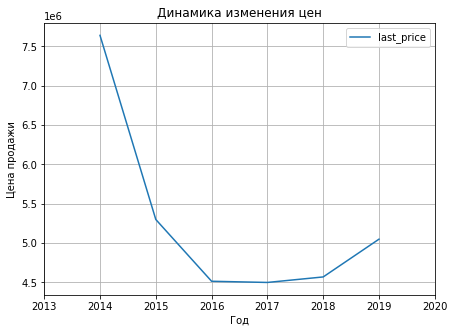

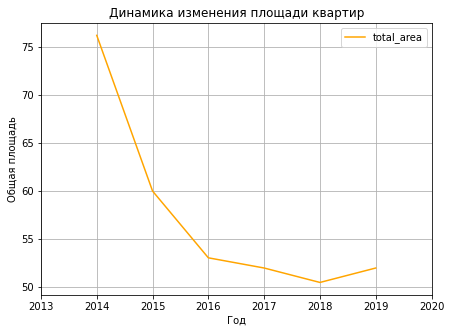

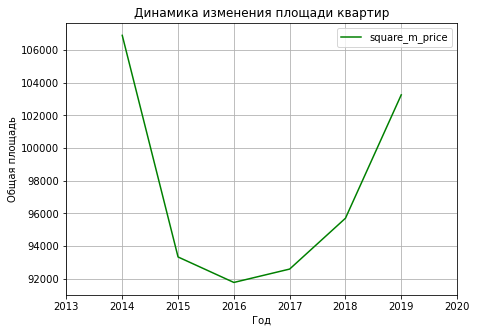

,last_price,square_m_price,total_area
publication_year,,,
2014,7640000,106901.5,76.18
2015,5300000,93333.0,60.00
2016,4515000,91773.0,53.06
2017,4500000,92592.0,52.00
2018,4570000,95704.0,50.50
2019,5050000,103260.0,52.00


In [78]:
# Динамика изменения цен
(data
    .pivot_table(index='publication_year', values=['last_price'], aggfunc='median')
    .plot(grid=True, 
          figsize=(7, 5), 
          xlim=([2013, 2020]),
          title='Динамика изменения цен',
          xlabel='Год',
          ylabel='Цена продажи')
)

plt.show()

# Динамика изменения площади
(data
    .pivot_table(index='publication_year', values=['total_area'], aggfunc='median')
    .plot(grid=True, 
          figsize=(7, 5), 
          xlim=([2013, 2020]),
          title='Динамика изменения площади квартир',
          xlabel='Год',
          ylabel='Общая площадь',
          color='orange')
)

plt.show()

# Динамика изменения площади
(data
    .pivot_table(index='publication_year', values=['square_m_price'], aggfunc='median')
    .plot(grid=True, 
          figsize=(7, 5), 
          xlim=([2013, 2020]),
          title='Динамика изменения площади квартир',
          xlabel='Год',
          ylabel='Общая площадь',
          color='green')
)

plt.show()

# Добавила таблицу, чтобы видеть динамику в цифрах
(data
    .pivot_table(index='publication_year', values=['last_price', 'total_area', 'square_m_price'], aggfunc='median')
)

После снижения цен за квадратный метр жилья, начавшегося в 2015, продолжившимся в 2016, из графиков видно, что рынок перестроился и стремился удержать цену, уменьшая площадь квартир (это если говорить о новостройках). Это хорошо прослеживается с 2016 по 2018 год. В 2019 площади немного выросли, но при этом выросла и цена, причем непропорционально. Здесь можно обратить внимание на медианную цену квадратного метра в разные годы - она неуклонно росла c 2016, даже несмотря на колебания и резко "подскочила" в 2019. Таким образом, начиная с 2016 года имеем потоянное фактическое подорожание квадратного метра жилья.

### 4.4 Исследование стоимости квадратного метра

В этом разделе изучим стоимость квадратного метра в разных населенных пунктах. Работать будем с десятью самыми крупными из них.

In [79]:
# Выделим топ-10 самых крупных населенных пунктов
top10_locations = list(data['locality_name'].value_counts().head(10).index)
top10_locations_price = (data
                         .query('locality_name in @top10_locations')
                         .pivot_table(index='locality_name', values='square_m_price', aggfunc=['median'])
                        )
top10_locations_price.columns = ['median_sqm_price']
top10_locations_price['median_sqm_price'] = top10_locations_price['median_sqm_price'].astype(int)
top10_locations_price['median_sqm_price'].sort_values(ascending=False)

locality_name
Санкт-Петербург      104793
Пушкин               100000
деревня Кудрово       91860
посёлок Парголово     91642
посёлок Мурино        86058
посёлок Шушары        76829
Колпино               74723
Гатчина               67796
Всеволожск            65789
Выборг                58307
Name: median_sqm_price, dtype: int32

Итак, дороже всего квадратный метр жилья стоит в Санкт-Петербурге - 104793 руб./м2, что ожидаемо. Дальше в списке идут районы Санкт-Перебруга, где в последние годы развито строительство и сравнительно легко добраться в центр (хотя и долго). Самый дешевый квадратный метр жилья из топ-10 - в Выбороге - 58307 руб./м2 - это популярный туристический город, но расположен далеко от Санкт-Петербурга, что отрицательно повлияло на цену метра.

### 4.5 Исследование стоимости километра расстояния от центра

В этом разделе изучим сколько "стоит" каждый километр расстояния от центра Санкт-Петербурга (внутри города).

                mean_price  median_price
city_center_km                          
0                 23442315      11750000
1                 18850851      10835000
2                 16163313       9500000
3                 13452829       8500000
4                 13586091       9900000
5                 15305282       8910131
6                 14389106       8005000
7                 12798899       7500000
8                  8420942       6500000
9                  6447319       5000000
10                 6372452       5000000
11                 5965774       4999500
12                 5976966       5000000
13                 6018411       5200000
14                 5757875       4900000
15                 5542779       4800000
16                 5525491       4650000
17                 4872388       4450000
18                 5349032       4420000
19                 4678755       4499500
20                 6393163       6100000
21                 5183239       4700000
22              

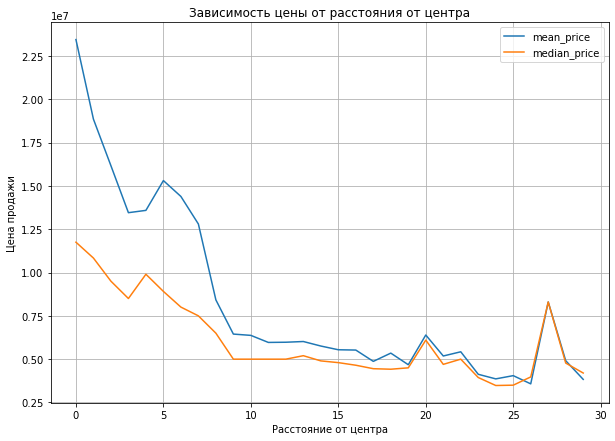

In [80]:
# Выделяем объекты из СПб с указанным расстоянием от центра, группируем по расстоянию от центра в км и находим среднюю цену
# Также вычислила медианную цену для проверки распределения
center_km_stat = (data
                    .query('locality_name == "Санкт-Петербург" & cityCenters_nearest != 999999')
                    .pivot_table(index='city_center_km', values='last_price', aggfunc=['mean', 'median'])
                    .astype(int)
                 )

center_km_stat.columns = ['mean_price', 'median_price']
print(center_km_stat)

(center_km_stat
     .plot(grid=True, 
          figsize=(10, 7), 
          title='Зависимость цены от расстояния от центра',
          xlabel='Расстояние от центра',
          ylabel='Цена продажи') 
)

plt.show()

In [81]:
# Посмотрим, что происходит на пиках в графике

# 5км
print(data
     .query('locality_name == "Санкт-Петербург" & city_center_km == 5')[['locality_name', 'last_price']]
     .sort_values(by='last_price')
    )

# 20км
print(data
     .query('locality_name == "Санкт-Петербург" & city_center_km == 20')[['locality_name', 'last_price']]
     .sort_values(by='last_price')
    )

# 27км
print(data
     .query('locality_name == "Санкт-Петербург" & city_center_km == 27')[['locality_name', 'last_price']]
     .sort_values(by='last_price')
    )

         locality_name  last_price
17753  Санкт-Петербург     1800000
19546  Санкт-Петербург     1850000
10208  Санкт-Петербург     1900000
13739  Санкт-Петербург     2100000
20054  Санкт-Петербург     2730000
...                ...         ...
7857   Санкт-Петербург   150000000
8900   Санкт-Петербург   190870000
5893   Санкт-Петербург   230000000
13749  Санкт-Петербург   240000000
15651  Санкт-Петербург   300000000

[768 rows x 2 columns]
         locality_name  last_price
13901  Санкт-Петербург     2890000
3621   Санкт-Петербург     2900000
7870   Санкт-Петербург     3200000
2854   Санкт-Петербург     3350000
9579   Санкт-Петербург     3450000
...                ...         ...
19521  Санкт-Петербург    10000000
1917   Санкт-Петербург    10150000
17638  Санкт-Петербург    10487000
21809  Санкт-Петербург    10600000
6353   Санкт-Петербург    11620701

[83 rows x 2 columns]
        locality_name  last_price
5961  Санкт-Петербург     2250000
748   Санкт-Петербург    14350000


Как и ожидалось, чем дальше от центра - тем, в целом, дешевле квадратный метр жилья. Можно выделить следующие особенности:
- в районе 4-5 км от центра наблюдается небольшой пик: предположу, что здесь квартиры более комфортные чем в старой застройке, характерной для самого центра, отсюда и повышение цены
- наблюдаются небольшие пики в конце графика - в самых удаленных районах:
    - на 20км - здесь довольно много объектов с большим разбросом стоимости
    - на 27км - здесь всего два объекта и один с большой разнице в цене

Ещё одна интересная особеность зависимости цены от удаленности от центра - это большая разница между средним и медианным значением в центре города, поскольку здесь есть очень дорогие квартиры. Чем дальше от центра - тем меньше разброс стоимости: видно как на графике средняя цена стремиться к медианной.

## Шаг 5. Общий вывод

Зафиксируем выводы по каждой группе исследований и обобщим.

#### Работа с пропусками
В датасете обнаружено много пропусков значений, важных для исследований, в том числе картографических, которые заполняются без участия создателя объявления. Зачастую такие пропуски не удается восстановить. 
Пользовательские данные легче поддаются восстановлению и удалению аномалий.

#### Изучение параметров объектов
Здесь выяснилось, что практически по всем параметром распределение количества объектов отличаетсчя от нормального: зачастую большиство значений сосредоточено на небольших величинах, но имеет очень длинный хвост, куда попадают объекты с нехарактерно большими параметрами (например, площадь квартир - большиство квартир имеет площадь 25-50 м2, в то время как самый большой объект имеет площадь 900 м2).

#### Скорость продажи квартиры
Чаще всего квартиры продаются за 42-60 дней, при этом медианное время заключения сделки 95 дней, а среднее 180, что говорит о том, что среди объявлений встретились такие объекты, на продажу которых ушло гораздо больше времени. Например, а необычно долгим сроком продаж квартиры принят период 510 дней (верхняя граница нормальных значений).

#### Влияние различных факторов на цену квартиры
Сильнее всего на цену квартиры (из изученных параметров) влияет ее общая площадь и параметры связанные с ней, а также этаж, на котором расположена квартира: первый - самый дешевый, последний - самый дорогой (хороший вид из окна вполне может быть фактором роста цены). Самое слабое влияние на цену оказывает дата размещения объявления, ведь она никак не связана с характеристиками жилого помещения.

#### Стоимость квадратного метра в различных населенных пунктах
Выделили топ-10 населенных пунктов, с самым большим числом объявлений, среди них выяснилось, что самая высокая стоимость квадратного метра жилья в Санкт-Петербурге - 114851 руб./м2 (ожидаемо), самая низкая - в Выборге 58237 руб./м2. Удаленность от города, вынужденные затраты на дорогу сильно повлияли на стоимость жилплощади, снизив ее почти в два раза.

#### Стоимость километра в черте Санкт-Петербурга
Удаленность от центра Санкт-Петербурга, определенно влияет на цену - чем дальше, тем дешевле квартиры (за исключением нескольких пиков), при этом квартиры в центре значительно дороже тех, что расположены в более дальних районах. Также в центре города наблюдается большой разброс цен, который сужается по мере удаления к границам города.

#### Итог
Наиболее сильно на стоимость квартир влияет ее общая площадь, этаж и расположение относительно центра, но в любом случае эти зависимости не прямые (нелинейные) и, конечно, есть дополнительные факторы, влияющие на итоговую цену, их нужно будет изучить дополнительно (за рамками данного проекта).